In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import preprocessing

warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv("samples/EDA/data.csv")

==========================================
Bike Sharing Dataset
==========================================

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


=========================================
Background 
=========================================

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into
a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important
events in the city could be detected via monitoring these data.

=========================================
Data Set
=========================================
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to  
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is 
publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then 
extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com. 

=========================================
Associated tasks
=========================================

	- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	
	- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are 
		identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.


=========================================
Files
=========================================

	- Readme.txt
	- hour.csv : bike sharing counts aggregated on hourly basis. Records: 17379 hours
	- day.csv - bike sharing counts aggregated on daily basis. Records: 731 days

	
=========================================
Dataset characteristics
=========================================	
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)

In [3]:
data.drop('instant', axis=1, inplace = True)

### 확인

In [4]:
data

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


* season : weekday 는 날짜 관련 데이터
    * season은 계절 (1 : 겨울, 2 : 봄, 3 : 여름, 4 : 가을)
    * weekday (0\~6 : 일\~월)
* weathersit : windspeed 는 날씨 관련 데이터
    * weathersit 는 날씨 (1 : 맑음, 2 : 구름 or 안개, 3 : 비, 4 : 폭우)
    * temp ~ atemp 는 온도
    * hum 은 습도
    * windspeed 는 풍량
* casual : cnt 는 이용자 수 관련 데이터
    * casual 은 비회원
    * registered 는 회원
    * cnt 는 합


In [5]:
len(data)

17379

In [6]:
data.nunique()

dteday        731
season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
casual        322
registered    776
cnt           869
dtype: int64

In [7]:
data.dteday.value_counts()[-20:]

2011-01-14    23
2011-10-19    23
2011-03-21    23
2011-03-07    23
2011-02-25    23
2012-11-29    23
2011-01-03    22
2011-03-10    22
2011-02-11    22
2011-01-11    22
2011-02-28    22
2011-01-12    22
2011-08-27    18
2011-02-22    18
2011-08-28    17
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: dteday, dtype: int64

In [8]:
data.dtypes # 데이터 타입

dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
pd.isnull(data).sum() # 결측치 없음

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
data['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

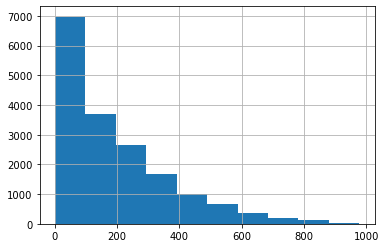

In [11]:
data['cnt'].hist()

In [12]:
data['weathersit'].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

### 계절이 변하는 날

In [13]:
df1 = data[['dteday', 'season']]
df1['season_change'] = df1['season'].shift(1, fill_value=1) != df1['season']

In [14]:
season_change = list(df1[df1['season_change'] == True]['dteday'])
print(season_change)


['2011-03-21', '2011-06-21', '2011-09-23', '2011-12-21', '2012-03-21', '2012-06-21', '2012-09-23', '2012-12-21']


In [15]:
season_change_month = ['2011_4', '2011_7', '2011_10', '2012_1', '2012_4', '2012_7', '2012_10']

## 시각화

### 기후 : 월별 온도

In [16]:
df1 = data[['yr', 'mnth', 'temp', 'atemp', 'hum', 'windspeed']].groupby(['yr', 'mnth'], as_index=False).mean()
df2 = data[['yr', 'mnth', 'temp', 'atemp', 'hum', 'windspeed']].groupby(['yr', 'mnth'], as_index=False).max()
df3 = data[['yr', 'mnth', 'temp', 'atemp', 'hum', 'windspeed']].groupby(['yr', 'mnth'], as_index=False).min()
df1['yr_mnth'] = (df1['yr'] + 2011).astype(str) + '_' + df1['mnth'].astype(str)
df2['yr_mnth'] = (df2['yr'] + 2011).astype(str) + '_' + df2['mnth'].astype(str)
df3['yr_mnth'] = (df3['yr'] + 2011).astype(str) + '_' + df3['mnth'].astype(str)
df3['temp_diff'] = df2['temp'] - df3['temp']

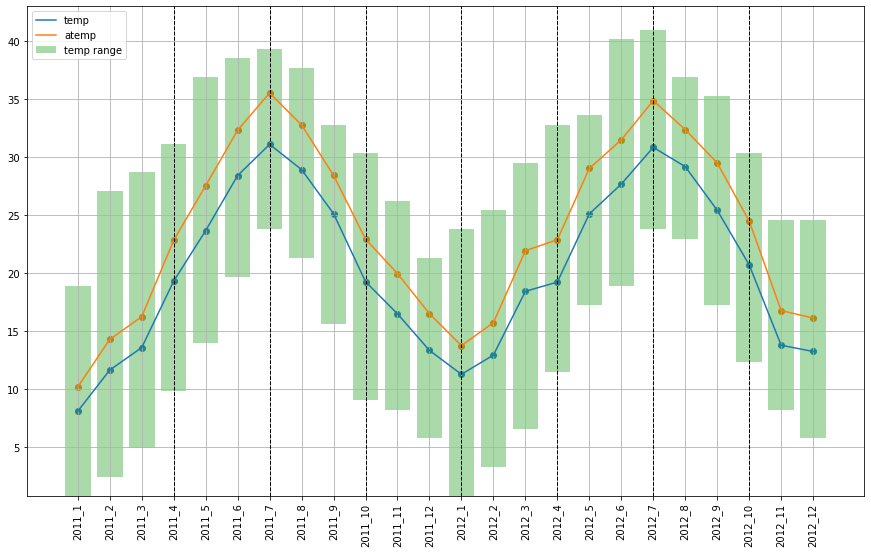

In [17]:
fig, ax1 = plt.subplots(figsize = (15, 9))

ax1.plot(df1.yr_mnth, df1.temp * 41, label = 'temp')
ax1.scatter(df1.yr_mnth, df1.temp * 41)
ax1.plot(df1.yr_mnth, df1.atemp * 50, label = 'atemp')
ax1.scatter(df1.yr_mnth, df1.atemp * 50)

ax1.bar(df1.yr_mnth, df3.temp_diff * 41, bottom=df3.temp * 41, alpha=0.4, label = 'temp range')

for i in season_change_month:
    ax1.axvline(x=i, linestyle='--', linewidth=1, c='black')

ax1.set_xticklabels(df1.yr_mnth, rotation = 90)
ax1.grid(True)

ax1.legend(loc = 'upper left')

### 기후 : 월별 습도, 풍량

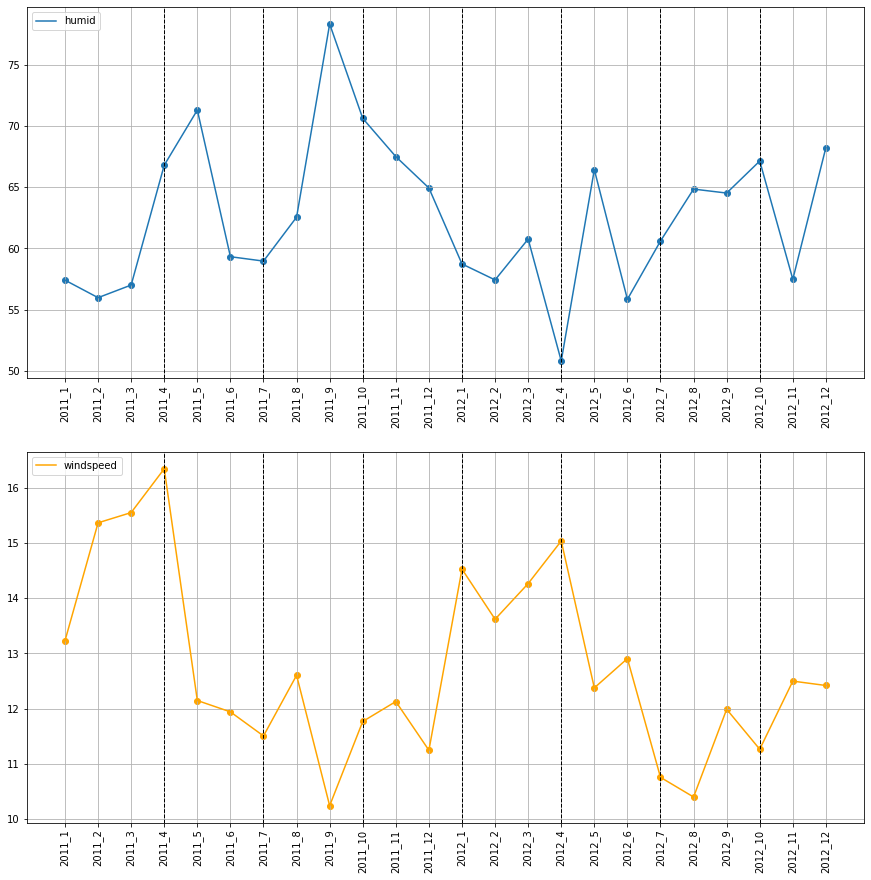

In [18]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.plot(df1.yr_mnth, df1.hum * 100, label = 'humid')
ax1.scatter(df1.yr_mnth, df1.hum * 100)
ax2.plot(df1.yr_mnth, df1.windspeed * 67, label = 'windspeed', color = 'orange')
ax2.scatter(df1.yr_mnth, df1.windspeed * 67, color = 'orange')

ax1.set_xticklabels(df1.yr_mnth, rotation = 90)
ax2.set_xticklabels(df1.yr_mnth, rotation = 90)
ax1.grid(True)
ax2.grid(True)

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper left')

for i in season_change_month:
    ax1.axvline(x=i, linestyle='--', linewidth=1, c='black')
    ax2.axvline(x=i, linestyle='--', linewidth=1, c='black')

plt.show()

### 이용자 : 시간당 이용자 수 분포

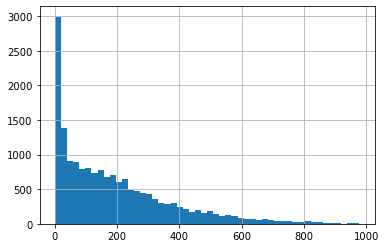

In [19]:
data['cnt'].hist(bins=50)

### 이용자 : 월별 이용자 수

In [20]:
df1 = data[['yr', 'mnth', 'cnt', 'casual', 'registered']].groupby(['yr', 'mnth'], as_index=False).sum()
df1['yr_mnth'] = (df1['yr'] + 2011).astype(str) + '_' + df1['mnth'].astype(str)
df1['regi_ratio'] = df1['registered'] / df1['cnt'] * 100

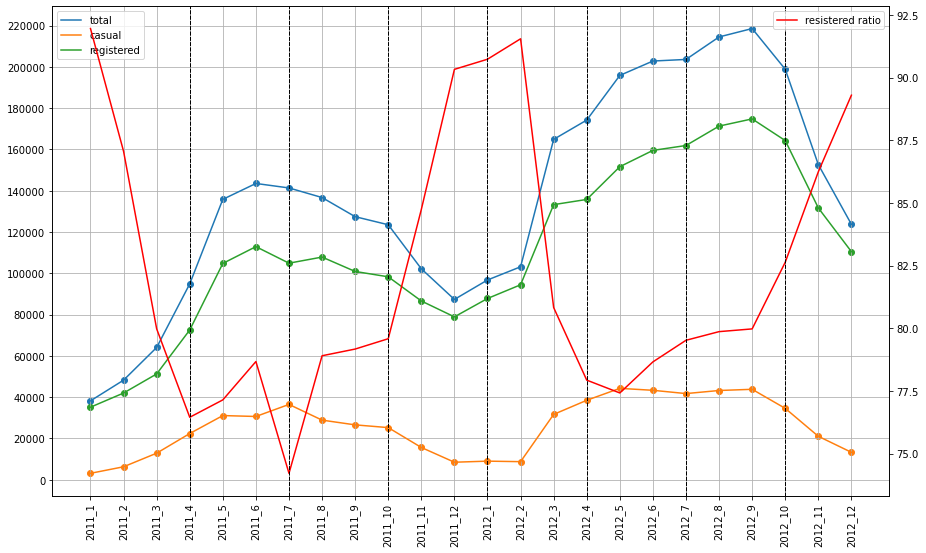

In [21]:
fig, ax1 = plt.subplots(figsize = (15, 9))
ax2 = ax1.twinx()

ax1.plot(df1.yr_mnth, df1.cnt, label = 'total')
ax1.scatter(df1.yr_mnth, df1.cnt)
ax1.plot(df1.yr_mnth, df1.casual, label = 'casual')
ax1.scatter(df1.yr_mnth, df1.casual)
ax1.plot(df1.yr_mnth, df1.registered, label = 'registered')
ax1.scatter(df1.yr_mnth, df1.registered)
ax2.plot(df1.yr_mnth, df1.regi_ratio, 'r', label = 'resistered ratio')

ax1.set_xticklabels(df1.yr_mnth, rotation = 90)
ax1.set_yticks(np.arange(0, 240000, 20000))
ax1.grid(True)

for i in season_change_month:
    ax1.axvline(x=i, linestyle='--', linewidth=1, c='black')
    ax2.axvline(x=i, linestyle='--', linewidth=1, c='black')
    
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

In [22]:
data.groupby('dteday')

### 이용자 : 시간별 이용자 수

In [23]:
df1 = data[['hr', 'casual', 'registered', 'cnt']].groupby('hr', as_index=False).mean()
df1['hr'] = df1['hr'].astype(str)
df1['regi_ratio'] = df1['registered'] / df1['cnt'] * 100

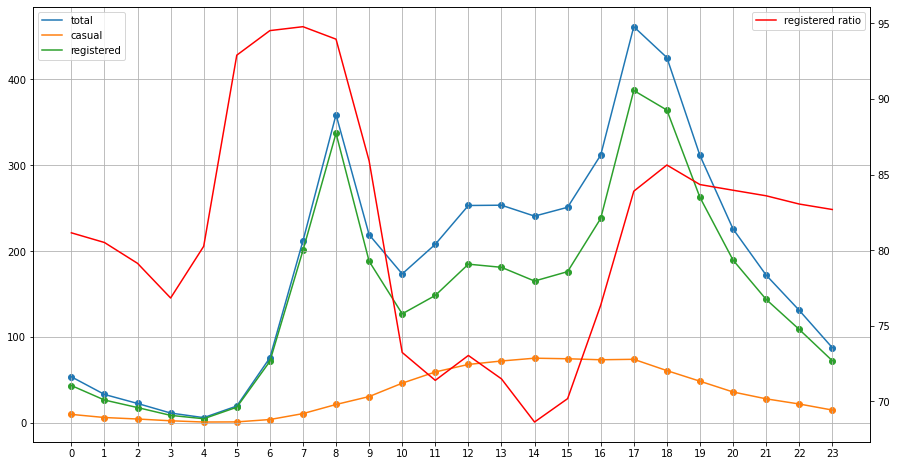

In [24]:
fig, ax1 = plt.subplots(figsize = (15, 8))
ax2 = ax1.twinx()

ax1.plot(df1.hr, df1.cnt, label = 'total')
ax1.scatter(df1.hr, df1.cnt)
ax1.plot(df1.hr, df1.casual, label = 'casual')
ax1.scatter(df1.hr, df1.casual)
ax1.plot(df1.hr, df1.registered, label = 'registered')
ax1.scatter(df1.hr, df1.registered)
ax2.plot(df1.hr, df1.regi_ratio, 'r', label = 'registered ratio')

ax1.set_xticklabels(df1.hr)
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
ax1.grid(True) 

### 이용자 : 날씨별 이용자 수

In [25]:
df1 = data[['weathersit', 'casual', 'registered', 'cnt']].groupby('weathersit', as_index=False).mean()
df1['weathersit'] = df1['weathersit'].astype(str)
df1['regi_ratio'] = df1['registered'] / df1['cnt'] * 100

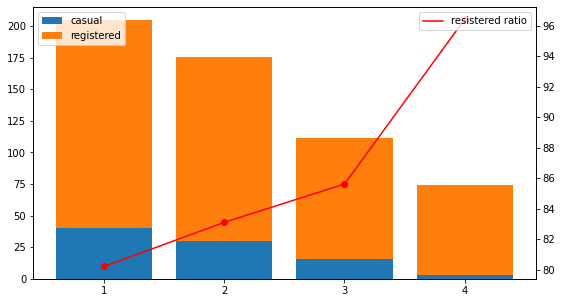

In [26]:
fig, ax1 = plt.subplots(figsize=(9,5))
ax2 = ax1.twinx()

ax1.bar(df1.weathersit, df1.casual, label = 'casual')
ax1.bar(df1.weathersit, df1.registered, bottom= df1.casual, label = 'registered')

ax2.plot(df1.weathersit, df1.regi_ratio, 'r', label = 'resistered ratio')
ax2.scatter(df1.weathersit, df1.regi_ratio, c='r')

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

### 이용자 : 요일별 이용자 수

In [27]:
df1 = data[['weekday', 'casual', 'registered', 'cnt']].groupby('weekday', as_index=False).mean()
df1['weekday'] = df1['weekday'].astype(str)
df1['regi_ratio'] = df1['registered'] / df1['cnt'] * 100

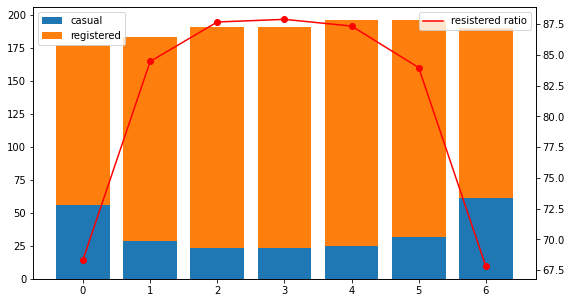

In [28]:
fig, ax1 = plt.subplots(figsize=(9,5))
ax2 = ax1.twinx()

ax1.bar(df1.weekday, df1.casual, label = 'casual')
ax1.bar(df1.weekday, df1.registered, bottom= df1.casual, label = 'registered')

ax2.plot(df1.weekday, df1.regi_ratio, 'r', label = 'resistered ratio')
ax2.scatter(df1.weekday, df1.regi_ratio, c='r')

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

### 이용자 : 휴일 여부에 따른 이용자 수

In [29]:
df1 = data[['workingday', 'casual', 'registered', 'cnt']].groupby('workingday', as_index=False).mean()
df1['workingday'] = df1['workingday'].astype(str)
df1['regi_ratio'] = df1['registered'] / df1['cnt'] * 100

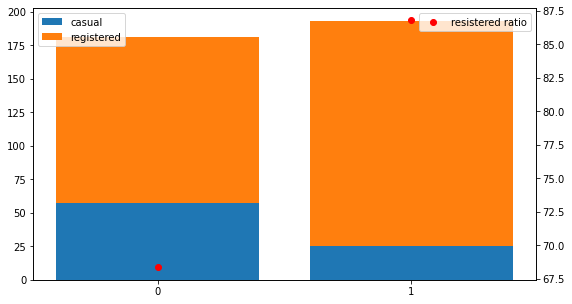

In [30]:
fig, ax1 = plt.subplots(figsize=(9,5))
ax2 = ax1.twinx()

ax1.bar(df1.workingday, df1.casual, label = 'casual')
ax1.bar(df1.workingday, df1.registered, bottom= df1.casual, label = 'registered')

# ax2.plot(df1.workingday, df1.regi_ratio, 'r', label = 'resistered ratio')
ax2.scatter(df1.workingday, df1.regi_ratio, c='r', label = 'resistered ratio')

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

In [31]:
df1 = data[['holiday', 'casual', 'registered', 'cnt']].groupby('holiday', as_index=False).mean()
df1['holiday'] = df1['holiday'].astype(str)
df1['regi_ratio'] = df1['registered'] / df1['cnt'] * 100

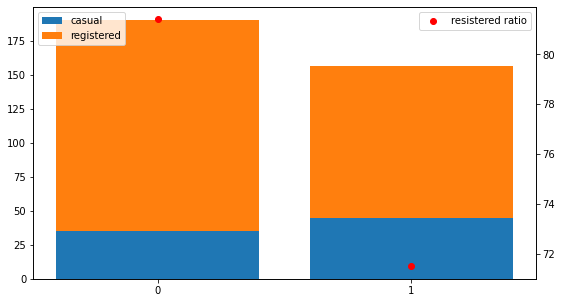

In [32]:
fig, ax1 = plt.subplots(figsize=(9,5))
ax2 = ax1.twinx()

ax1.bar(df1.holiday, df1.casual, label = 'casual')
ax1.bar(df1.holiday, df1.registered, bottom= df1.casual, label = 'registered')

# ax2.plot(df1.holiday, df1.regi_ratio, 'r', label = 'resistered ratio')
ax2.scatter(df1.holiday, df1.regi_ratio, c='r', label = 'resistered ratio')

ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

### 이용자 : 온도에 따른 이용자 수

In [33]:
df1 = data[['temp', 'casual', 'registered', 'cnt']].groupby('temp', as_index=False).mean()
df1['temp'] = df1['temp'] * 41
df1['temp'] = df1['temp'].round(1).astype(str)
df1['regi_ratio'] = df1['registered'] / df1['cnt'] * 100

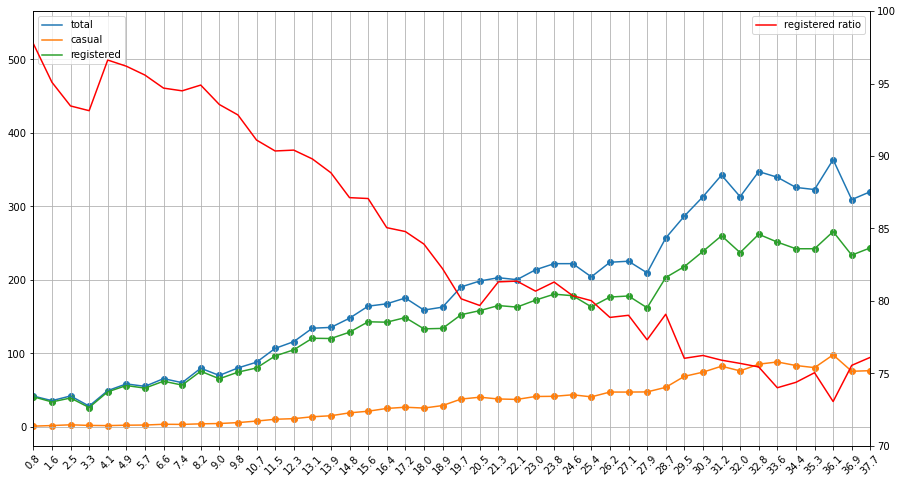

In [34]:
fig, ax1 = plt.subplots(figsize = (15, 8))
ax2 = ax1.twinx()

ax1.plot(df1.temp, df1.cnt, label = 'total')
ax1.scatter(df1.temp, df1.cnt)
ax1.plot(df1.temp, df1.casual, label = 'casual')
ax1.scatter(df1.temp, df1.casual)
ax1.plot(df1.temp, df1.registered, label = 'registered')
ax1.scatter(df1.temp, df1.registered)
ax2.plot(df1.temp, df1.regi_ratio, 'r', label = 'registered ratio')

ax1.set_xticklabels(df1.temp, rotation=45)
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

ax1.set_xlim([0, 45])
ax2.set_xlim([0, 45])
ax2.set_ylim([70, 100])
ax1.grid(True) 

In [35]:
df1 = data[['atemp', 'casual', 'registered', 'cnt']].groupby('atemp', as_index=False).mean()
df1['atemp'] = df1['atemp'] * 50
df1['atemp'] = df1['atemp'].round(1).astype(str)
df1['regi_ratio'] = df1['registered'] / df1['cnt'] * 100

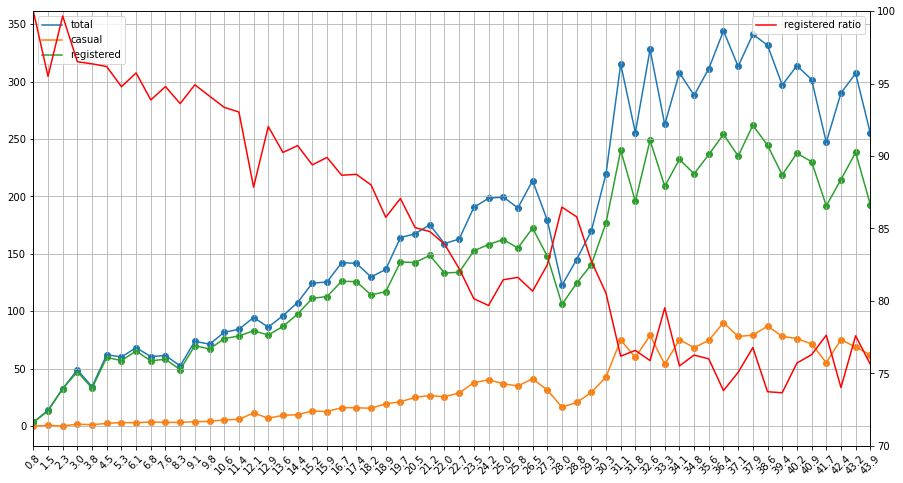

In [36]:
fig, ax1 = plt.subplots(figsize = (15, 8))
ax2 = ax1.twinx()

ax1.plot(df1.atemp, df1.cnt, label = 'total')
ax1.scatter(df1.atemp, df1.cnt)
ax1.plot(df1.atemp, df1.casual, label = 'casual')
ax1.scatter(df1.atemp, df1.casual)
ax1.plot(df1.atemp, df1.registered, label = 'registered')
ax1.scatter(df1.atemp, df1.registered)
ax2.plot(df1.atemp, df1.regi_ratio, 'r', label = 'registered ratio')

ax1.set_xticklabels(df1.atemp, rotation=45)
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')

ax1.set_xlim([1, 58])
ax2.set_xlim([1, 58])
ax2.set_ylim([70, 100])
ax1.grid(True) 

## 이용자 : 휴일 여부에 따른 시간대별 평균 이용자 수

In [60]:
df1 = data[data['workingday'] == 1]
df1 = df1[['hr', 'casual', 'registered', 'cnt']].groupby('hr', as_index=False).mean()
df1['hr'] = df1['hr'].astype(str)
df1['regi_ratio'] = df1['registered'] / df1['cnt'] * 100

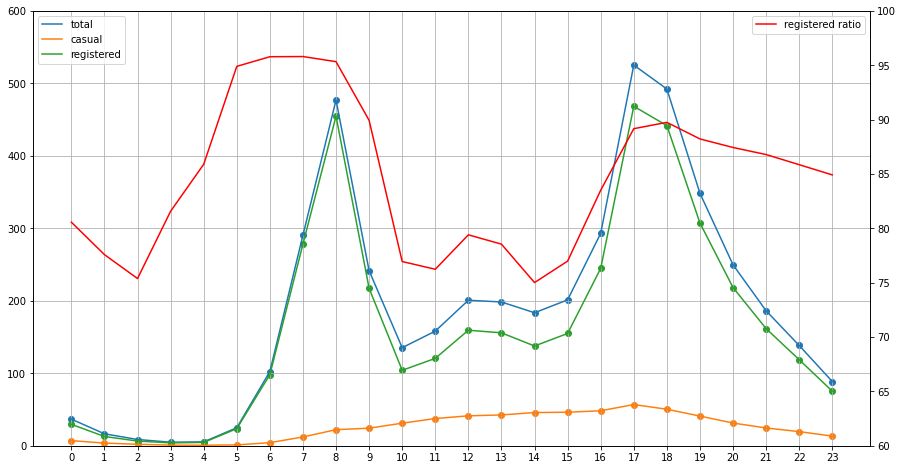

In [61]:
fig, ax1 = plt.subplots(figsize = (15, 8))
ax2 = ax1.twinx()

ax1.plot(df1.hr, df1.cnt, label = 'total')
ax1.scatter(df1.hr, df1.cnt)
ax1.plot(df1.hr, df1.casual, label = 'casual')
ax1.scatter(df1.hr, df1.casual)
ax1.plot(df1.hr, df1.registered, label = 'registered')
ax1.scatter(df1.hr, df1.registered)
ax1.set_ylim(0, 600)
ax2.set_ylim(60, 100)
ax2.plot(df1.hr, df1.regi_ratio, 'r', label = 'registered ratio')

ax1.set_xticklabels(df1.hr)
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
ax1.grid(True) 

In [62]:
df1 = data[data['workingday'] == 0]
df1 = df1[['hr', 'casual', 'registered', 'cnt']].groupby('hr', as_index=False).mean()
df1['hr'] = df1['hr'].astype(str)
df1['regi_ratio'] = df1['registered'] / df1['cnt'] * 100

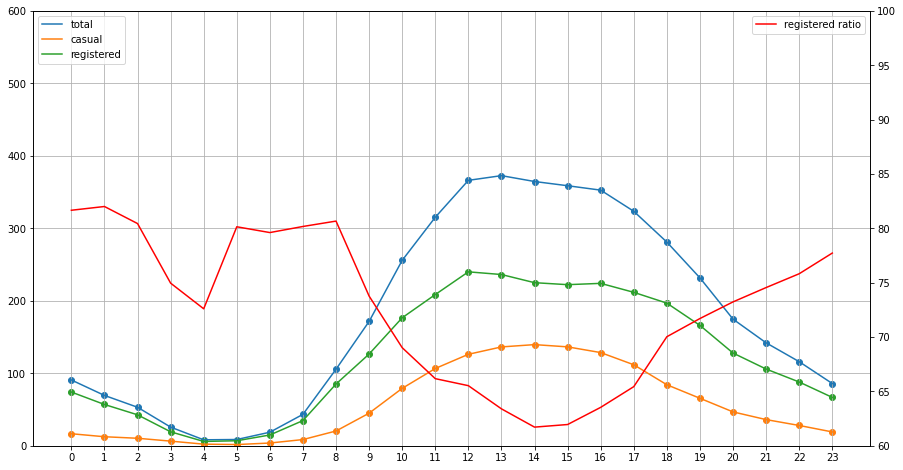

In [63]:
fig, ax1 = plt.subplots(figsize = (15, 8))
ax2 = ax1.twinx()

ax1.plot(df1.hr, df1.cnt, label = 'total')
ax1.scatter(df1.hr, df1.cnt)
ax1.plot(df1.hr, df1.casual, label = 'casual')
ax1.scatter(df1.hr, df1.casual)
ax1.plot(df1.hr, df1.registered, label = 'registered')
ax1.scatter(df1.hr, df1.registered)
ax1.set_ylim(0, 600)
ax2.set_ylim(60, 100)
ax2.plot(df1.hr, df1.regi_ratio, 'r', label = 'registered ratio')

ax1.set_xticklabels(df1.hr)
ax1.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
ax1.grid(True) 

In [72]:
len(data[data['season']==1][data['weathersit'] > 2]) / len(data[data['season']==1])

0.0876944837340877

In [73]:
len(data[data['season']==2][data['weathersit'] > 2]) / len(data[data['season']==2])

0.0920843728736675

In [74]:
len(data[data['season']==3][data['weathersit'] > 2]) / len(data[data['season']==3])

0.05983096085409253

In [75]:
len(data[data['season']==4][data['weathersit'] > 2]) / len(data[data['season']==4])

0.08861058601134215